<a href="https://colab.research.google.com/github/cly1213/Colab/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

In [2]:
from keras.datasets import mnist
from keras.utils import np_utils

import numpy as np
np.random.seed(10)
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train.shape={}, y_train.shape={}".format(X_train.shape, y_train.shape))

print("X_test.shape={}, y_test.shape={}".format(X_test.shape, y_test.shape))

11493376/11490434 [==============================] - 0s 0us/step
X_train.shape=(60000, 28, 28), y_train.shape=(60000,)
X_test.shape=(10000, 28, 28), y_test.shape=(10000,)


In [4]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')

X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

print("X_train.shape={}".format(X_train.shape))

print("X_test.shape={}".format(X_test.shape))

X_train.shape=(60000, 28, 28, 1)
X_test.shape=(10000, 28, 28, 1)


In [0]:
X_train = X_train / 255

X_test = X_test / 255

In [0]:
y_train = np_utils.to_categorical(y_train)

y_test_categories = y_test

y_test = np_utils.to_categorical(y_test)

In [0]:
from keras.models import Sequential

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [0]:
model = Sequential()

In [0]:
model.add(Conv2D(filters=16, kernel_size=(5, 5), padding='same', input_shape=(28, 28, 1), activation='relu'))

In [0]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [0]:
model.add(Conv2D(filters=36, kernel_size=(5, 5), padding='same', activation='relu'))

In [0]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [0]:
model.add(Dropout(0.25))

In [0]:
model.add(Flatten())

In [0]:
model.add(Dense(128, activation='relu'))

In [0]:
model.add(Dropout(0.5))

In [0]:
model.add(Dense(10, activation='softmax'))

In [44]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               225920    
__________

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [46]:
train_history = model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), validation_split=0.2, epochs=10, batch_size=300, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 2s - loss: 0.4217 - acc: 0.8695 - val_loss: 0.0792 - val_acc: 0.9761
Epoch 2/10
 - 2s - loss: 0.1247 - acc: 0.9633 - val_loss: 0.0476 - val_acc: 0.9846
Epoch 3/10
 - 2s - loss: 0.0924 - acc: 0.9730 - val_loss: 0.0384 - val_acc: 0.9867
Epoch 4/10
 - 2s - loss: 0.0740 - acc: 0.9780 - val_loss: 0.0340 - val_acc: 0.9888
Epoch 5/10
 - 2s - loss: 0.0630 - acc: 0.9806 - val_loss: 0.0298 - val_acc: 0.9900
Epoch 6/10
 - 2s - loss: 0.0548 - acc: 0.9836 - val_loss: 0.0289 - val_acc: 0.9895
Epoch 7/10
 - 2s - loss: 0.0482 - acc: 0.9855 - val_loss: 0.0256 - val_acc: 0.9916
Epoch 8/10
 - 2s - loss: 0.0459 - acc: 0.9863 - val_loss: 0.0256 - val_acc: 0.9915
Epoch 9/10
 - 2s - loss: 0.0426 - acc: 0.9872 - val_loss: 0.0206 - val_acc: 0.9936
Epoch 10/10
 - 2s - loss: 0.0380 - acc: 0.9886 - val_loss: 0.0232 - val_acc: 0.9912


In [0]:
def show_train_history(train_history, train, validation):

    plt.plot(train_history.history[train])

    plt.plot(train_history.history[validation])

    plt.title('Train History')

    plt.ylabel('train')

    plt.xlabel('Epoch')

    plt.legend(['train', 'validation'], loc='center right')

    plt.show()



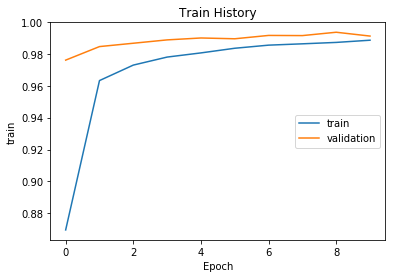

In [48]:
show_train_history(train_history, 'acc','val_acc')

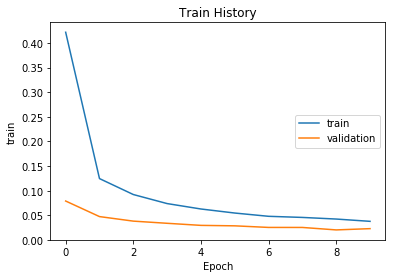

In [49]:
show_train_history(train_history, 'loss','val_loss')

In [50]:
scores = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 58us/step


In [51]:
scores[1]

0.9912

In [52]:
import pandas as pd

prediction = model.predict_classes(X_test)

print(y_test.shape)

pd.crosstab(y_test_categories, prediction, rownames=['label'], colnames=['predict'])

(10000, 10)


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,978,0,0,0,0,0,0,1,1,0
1,0,1134,0,0,0,0,0,1,0,0
2,2,2,1023,1,0,0,0,4,0,0
3,1,0,1,1005,0,2,0,0,1,0
4,0,0,1,0,971,0,0,0,0,10
5,1,0,0,6,0,882,1,0,0,2
6,7,2,1,0,1,3,942,0,2,0
7,0,2,2,0,0,0,0,1021,1,2
8,7,0,2,1,0,1,0,1,959,3
